In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

##Structure and Characteristics of the dataset



In [2]:
df=pd.read_csv('ola_driver.csv')
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.shape

(19104, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [7]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


From the above data, we can get the statistical values of the dataset like Mean, Minimum, Maximum, Count and so on.

##Converting date-like features to their respective data type

In [8]:
df["MMM-YY"]=pd.to_datetime(df["MMM-YY"])

In [9]:
df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"])

In [10]:
df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

##Check for missing values and Prepare data for KNN Imputation

In [12]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

The missing values are present in column: Age, Gender, LastWorkingDate.

Missing value in LastWorkingDate indicates that the driver has still not left OLA.

In [13]:
df.isnull().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [14]:
num_vars=df.select_dtypes(include=np.number)
column_names=num_vars.columns
print(column_names)

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')


In [15]:
imputer=KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_vars)
df_new=imputer.transform(num_vars)

In [16]:
df_new=pd.DataFrame(df_new)

In [17]:
df_new.columns= num_vars.columns

In [18]:
df_new.isnull().sum()
df_new.isnull().sum()/len(df_new)*100

Driver_ID               0.0
Age                     0.0
Gender                  0.0
Education_Level         0.0
Income                  0.0
Joining Designation     0.0
Grade                   0.0
Total Business Value    0.0
Quarterly Rating        0.0
dtype: float64

We have successfully imputed the missing values using KNN imputer.


In [19]:
df_new.nunique()

Driver_ID                2381
Age                        72
Gender                      6
Education_Level             3
Income                   2383
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [20]:
df['Driver_ID'].nunique()

2381

In [21]:
df.loc[df['Driver_ID']==56].shape

(24, 13)

In [22]:
agg_func={"MMM-YY":len,
"Age": "max",
"Gender": "first",
"Education_Level": "max",
"Income": "last",
"Joining Designation": "last",
"Grade": "last",
"Total Business Value": "sum",
"Quarterly Rating": "last",
"LastWorkingDate": "last",
"City": "first",
"Dateofjoining": "last"}
df1= df.groupby('Driver_ID').aggregate(agg_func).reset_index()

In [23]:
df1.shape

(2381, 13)

In [24]:
df1.rename(columns={'MMM-YY': "No_of_records", }, inplace=True)

##Feature Engineering



*   Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1




In [25]:
QR = df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})
QR1 = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})
#The dataset which has the employee ids and a bollean value which tells if the rati
QR2 = (QR1['Quarterly Rating']>QR['Quarterly Rating']).reset_index()
#the employee ids whose rating has increased
Emp_Id = QR2[QR2['Quarterly Rating']==True]['Driver_ID']
QRI = []
for i in df1['Driver_ID']:
  if i in Emp_Id.values:
    QRI.append(1)
  else:
    QRI.append(0)
df1['Quarterly_Rating_Increased'] = QRI



*   Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1



In [26]:
X = df.groupby('Driver_ID').agg({'Income':'first'})
X1 = df.groupby('Driver_ID').agg({'Income':'last'})
X2 = (X1['Income']>X['Income']).reset_index()
Emp_Id = X2[X2['Income']==True]['Driver_ID']
II = []
for i in df1['Driver_ID']:
  if i in Emp_Id.values:
    II.append(1)
  else:
    II.append(0)
df1['Income_Increased'] = II

In [27]:
df1.head()

,Driver_ID,No_of_records,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate,City,Dateofjoining,Quarterly_Rating_Increased,Income_Increased
0,1,3,28.0,0.0,2,57387,1,1,1715580,2,2019-03-11,C23,2018-12-24,0,0
1,2,2,31.0,0.0,2,67016,2,2,0,1,NaT,C7,2020-11-06,0,0
2,4,5,43.0,0.0,2,65603,2,2,350000,1,2020-04-27,C13,2019-12-07,0,0
3,5,3,29.0,0.0,0,46368,1,1,120360,1,2019-03-07,C9,2019-01-09,0,0
4,6,5,31.0,1.0,1,78728,3,3,1265000,2,NaT,C11,2020-07-31,1,0


In [28]:
df1['Income_Increased'].value_counts()

0    2338
1      43
Name: Income_Increased, dtype: int64

From the above data, it can be inferred that 43 drivers income has been increased.

In [29]:
drivers_left=df1["LastWorkingDate"].value_counts()

In [30]:
df1.describe(include="object")

,City
count,2381
unique,29
top,C20
freq,152


From the above data, it can be seen that most of the drivers are from C20 City

In [31]:
Y= ['Gender',
'City',
'Education_Level',
'Joining Designation',
'Grade',
'Quarterly Rating',
'Quarterly_Rating_Increased',
'Income_Increased']
# % of every cat in each feature
for i in Y:
  print(df1[i].value_counts(normalize=True)*100)
  print("-"*50)

0.0    58.966821
1.0    41.033179
Name: Gender, dtype: float64
--------------------------------------------------
C20    6.383872
C15    4.241915
C29    4.031919
C26    3.905922
C8     3.737925
C27    3.737925
C10    3.611928
C16    3.527929
C22    3.443931
C3     3.443931
C28    3.443931
C12    3.401932
C5     3.359933
C1     3.359933
C21    3.317934
C14    3.317934
C6     3.275934
C4     3.233935
C7     3.191936
C9     3.149937
C25    3.107938
C23    3.107938
C24    3.065939
C19    3.023940
C2     3.023940
C17    2.981940
C13    2.981940
C18    2.897942
C11    2.687946
Name: City, dtype: float64
--------------------------------------------------
2    33.683326
1    33.389332
0    32.927341
Name: Education_Level, dtype: float64
--------------------------------------------------
1    43.091138
2    34.229315
3    20.705586
4     1.511970
5     0.461991
Name: Joining Designation, dtype: float64
--------------------------------------------------
2    35.909282
1    31.121378
3    26.1654

58% drivers are male
out of 29 cities 6% drivers are from C20 city
33.6% drivers are graduated and 33% are 12th pass
43% drivers joined company as 1 designation
84% drivers quarterly rating not increased
98% drivers income not increased

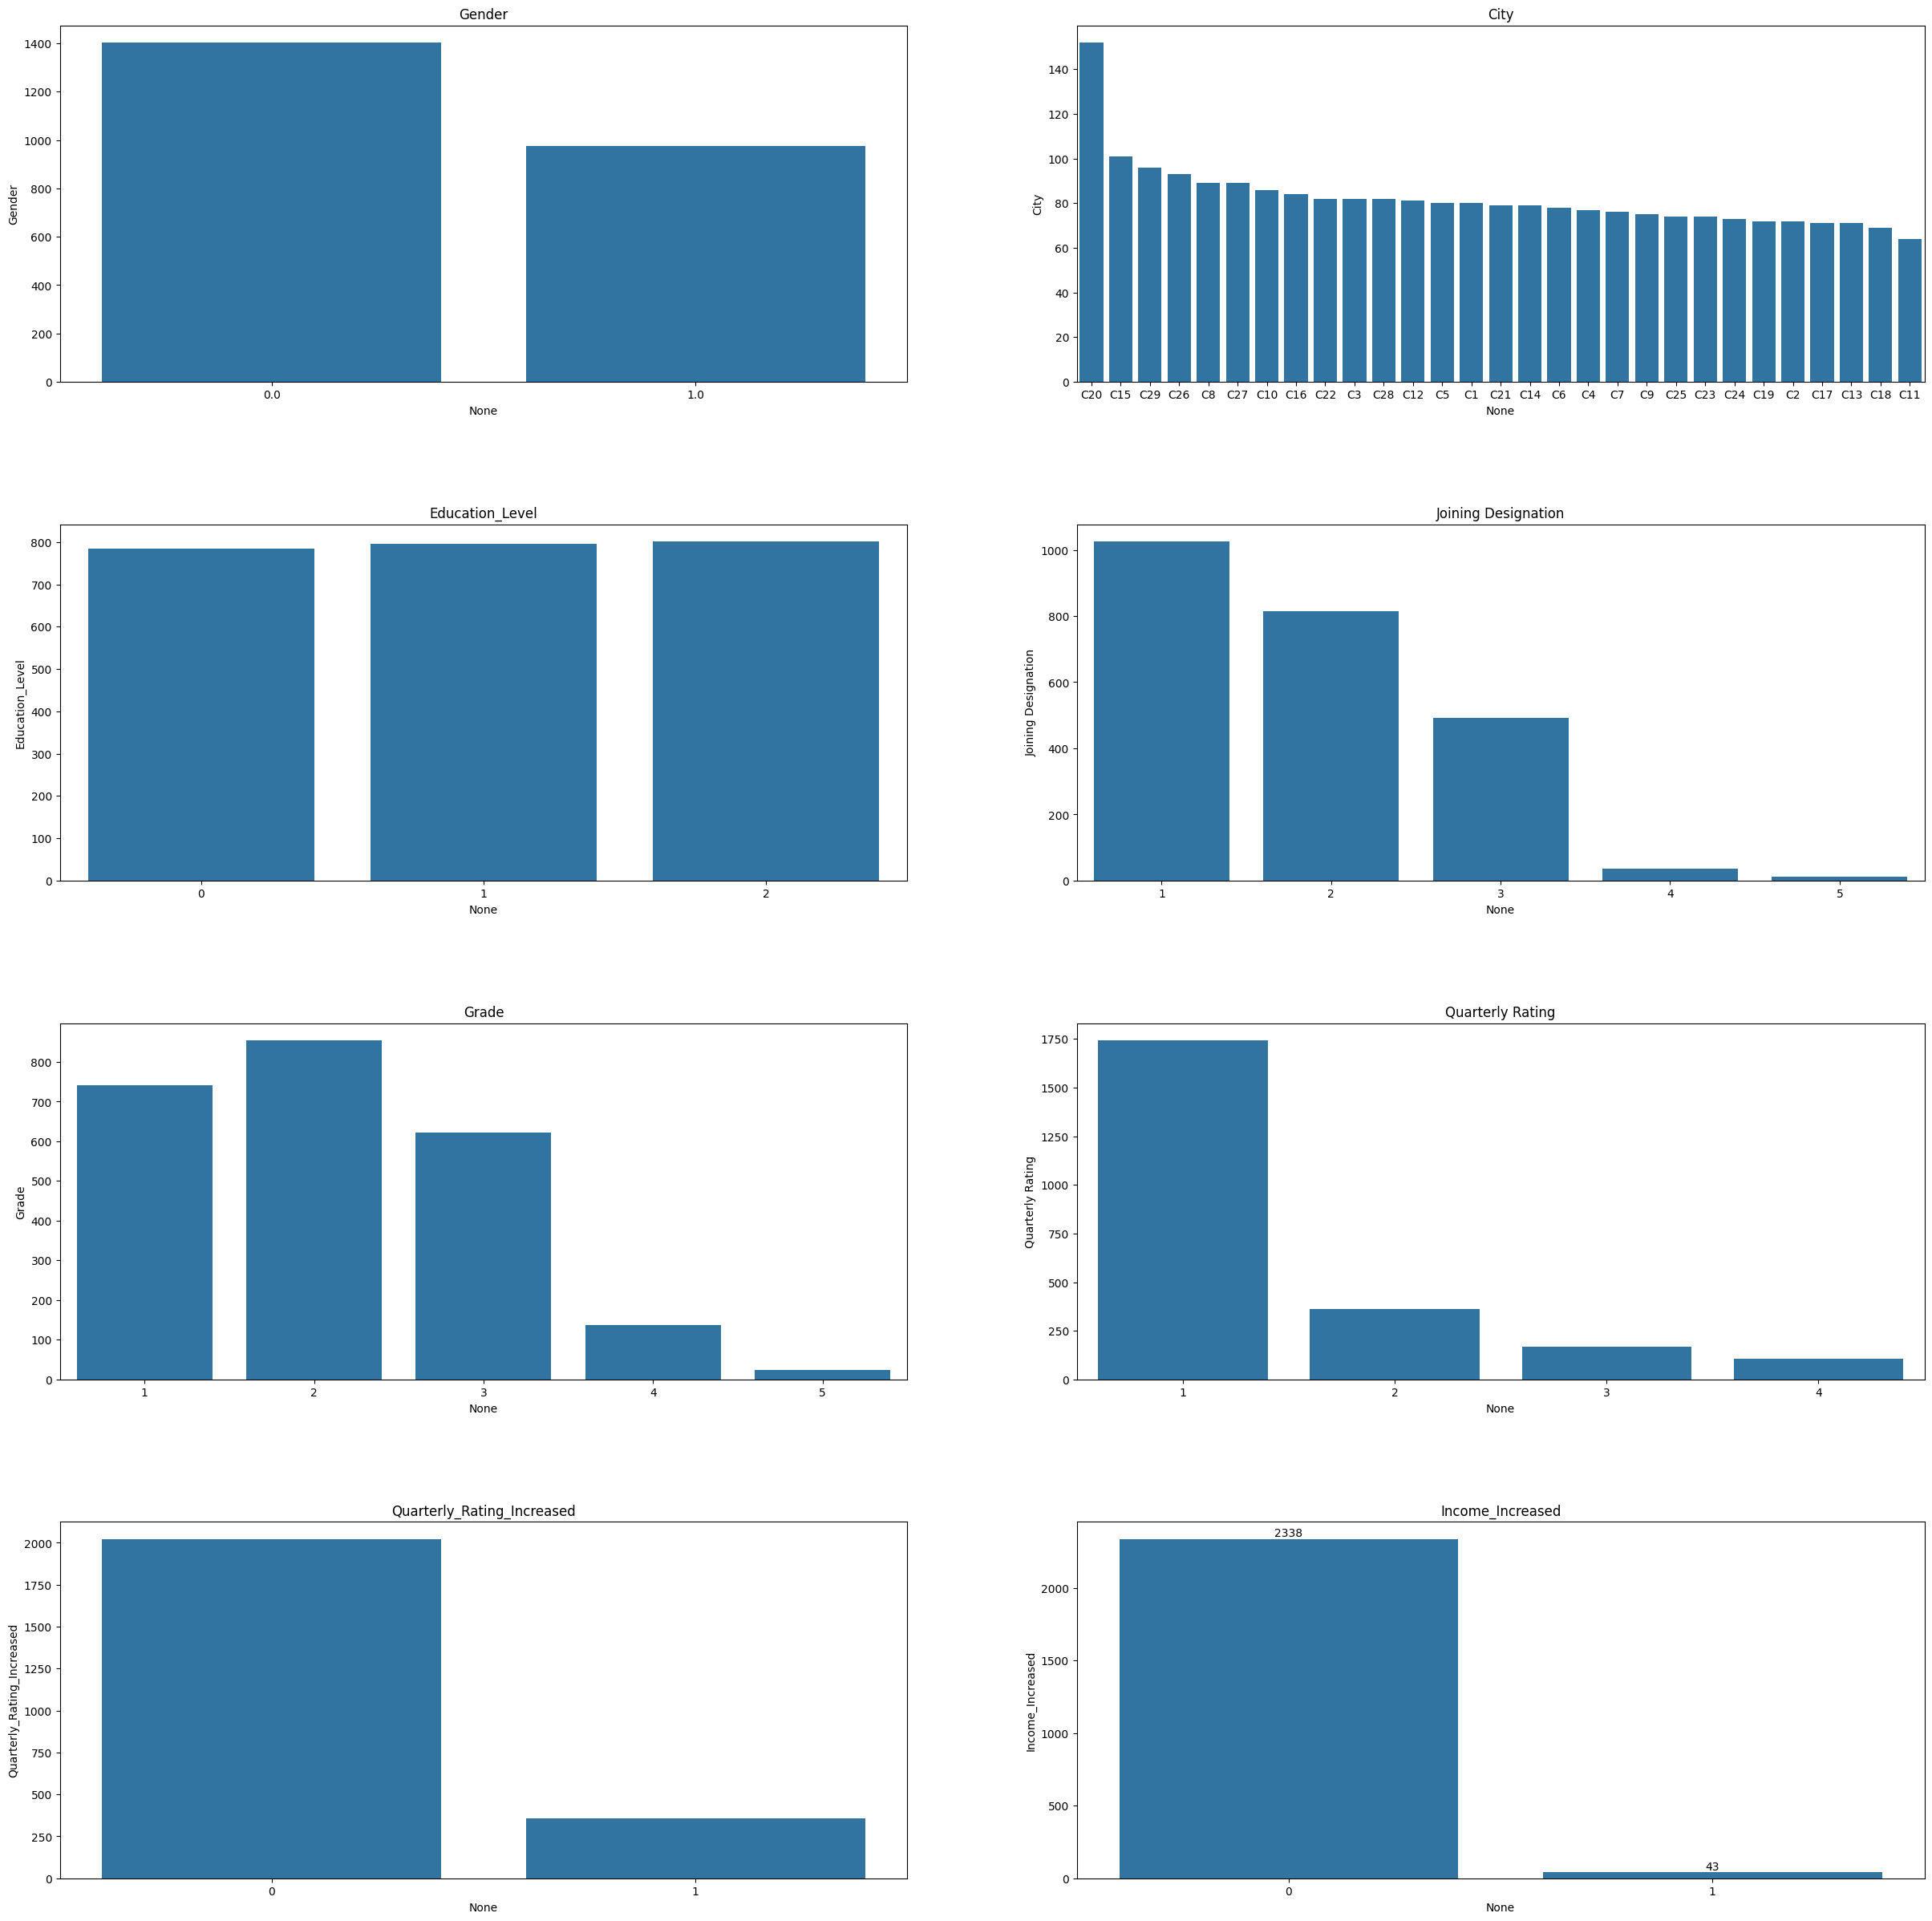

In [32]:
plt.figure(figsize= (30,30))
# plt.subplots_adjust(wspace= 0.3)
plt.subplots_adjust(hspace= 0.4)
for i in range(len(Y)):
  plt.subplot(4,2,i+1)
  lb= sns.barplot(x= df1[Y[i]].value_counts().index, y=df1[Y[i]].value_counts())
  plt.title(f"{Y[i]}")
for i in lb.containers:
  lb.bar_label(i)

<ipython-input-33-f65e707f10d0>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


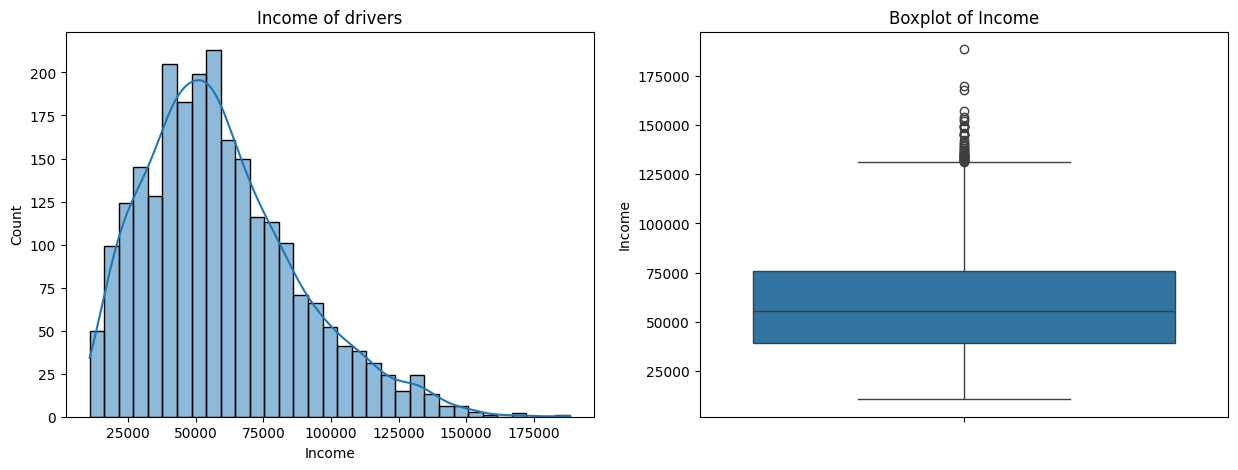

In [33]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df1['Income'],kde= True)
plt.title("Income of drivers")
plt.subplot(1,2,2)
sns.boxplot(df1['Income'])
plt.title('Boxplot of Income')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df1, x="City", hue="LastWorkingDate")
plt.show()

In [ ]:
df1['Age_Bin']=pd.cut(df1['Age'],bins=[10,25,40,55])
sns.countplot(data=df1, x='Age_Bin', hue='LastWorkingDate')
plt.xticks(rotation=90)
plt.show()

<Axes: >

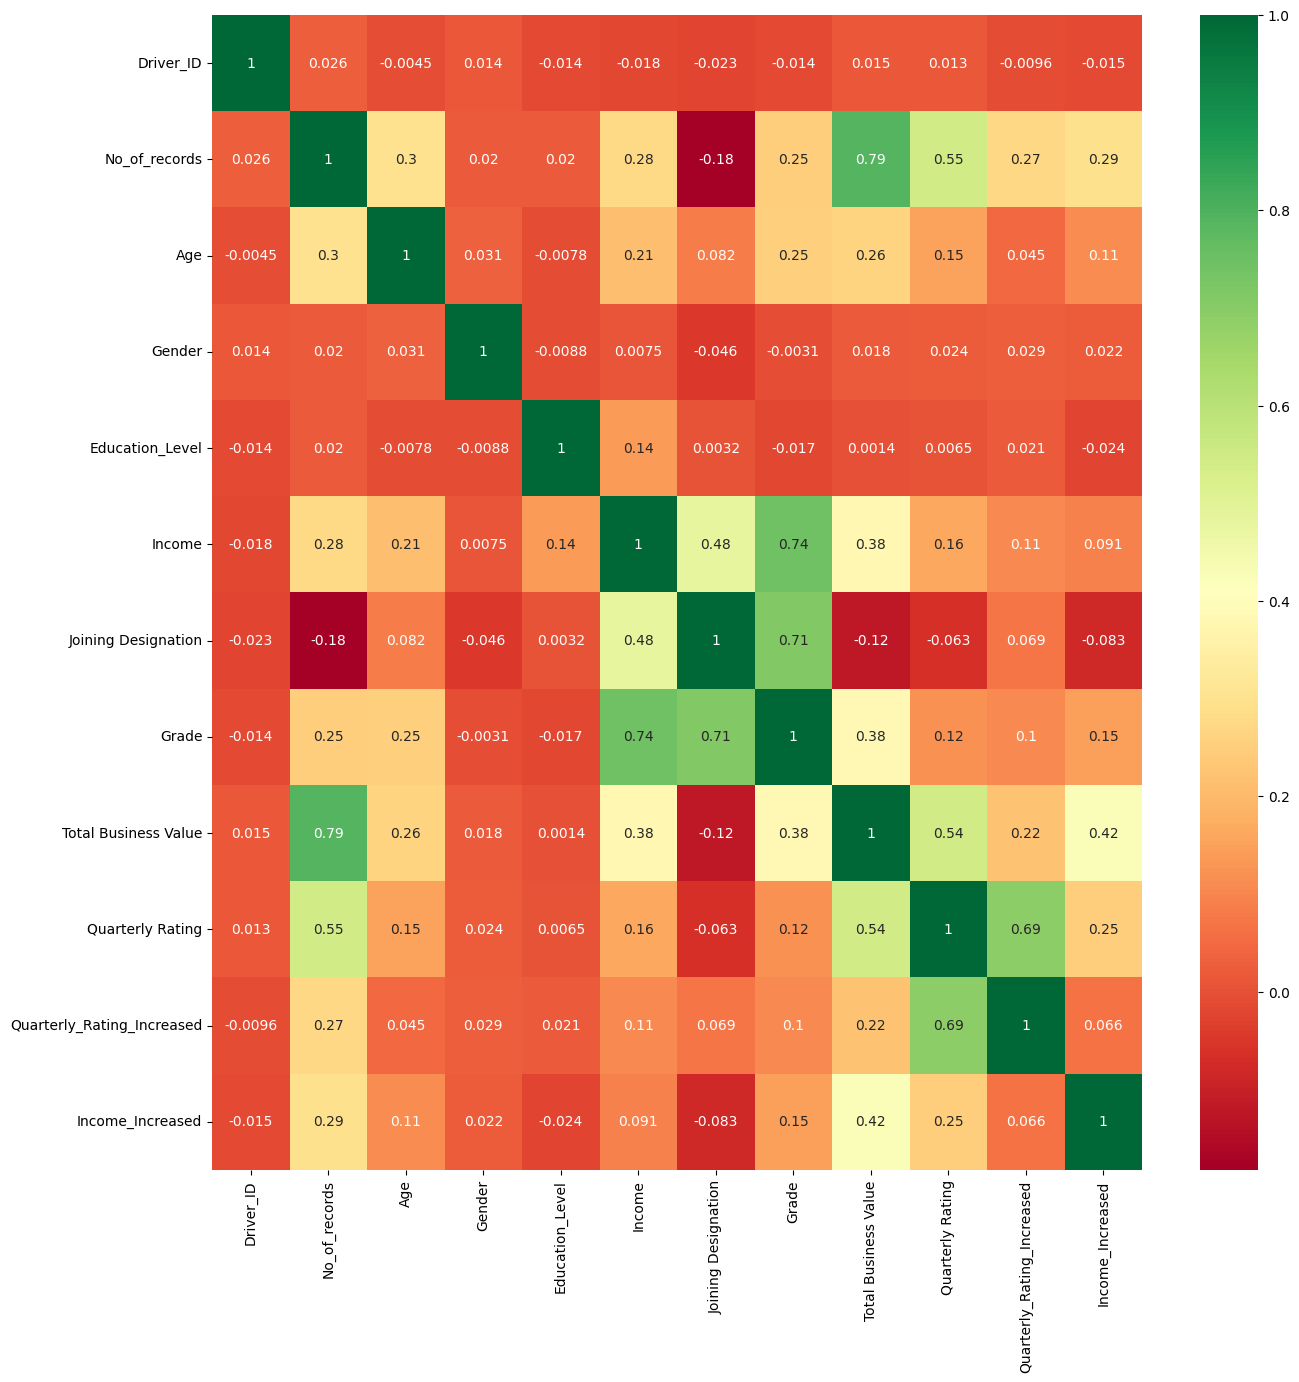

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(numeric_only=True) ,annot=True, cmap="RdYlGn")

In [37]:
#Converting categorical features to numerical values
df1 = pd.concat([df1,pd.get_dummies(df1['City'],prefix='City')],axis=1)

In [39]:
X = df1.drop(['Driver_ID','LastWorkingDate','City'],axis=1)

In [40]:
y=df1['LastWorkingDate']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=80)

In [50]:
print(X_train.shape)
print(X_test.shape)

(1904, 42)
(477, 42)


**MinMaxScaler**: In python, minmaxscaler scales each feature by subtracting its minimum value and tyhen dividing it by the range. The range is equals to Original maximum- Original minimum. This process preserves the original distribution and retains the embedded information.

In [55]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = list(set(X_train.columns) - set(numeric_cols))

scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_train.tail()

,No_of_records,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Dateofjoining,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
2051,0.521739,0.567568,0.0,0.0,0.685300,0.0,0.75,0.243989,0.000000,2016-05-01,...,0,0,0,0,1,0,0,0,0,0
522,1.000000,0.432432,0.0,0.5,0.476189,0.0,0.50,0.258858,0.333333,2015-10-15,...,0,0,0,0,0,0,0,0,0,0
2259,0.173913,0.270270,0.0,1.0,0.525747,0.5,0.50,0.017759,0.000000,2020-07-31,...,0,0,0,1,0,0,0,0,0,0
1212,1.000000,0.432432,0.0,0.5,0.492331,0.0,0.50,0.279268,0.333333,2017-11-06,...,0,0,0,0,0,0,0,0,0,0
1199,0.304348,0.513514,0.0,0.0,0.651029,0.5,0.50,0.033284,0.333333,2019-11-15,...,0,0,0,0,0,0,0,0,1,0


##Oversampling with SMOTE

In [ ]:
sm_ote=SMOTE(random_state=42)
X_train_res, y_train_res = sm_ote.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

In [ ]:
print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

##ROC Curve and AUC

An ROC curve depicts a classification models across various threshholds by plotting the true positive rate (recall) against the false positive rate. The true positive rate is the ratio of true positive to the sum of true positives and false negatives, while the false positive rate is the ratio of false positives to the sum of false positives and true negatives.

TPR= (TP)/(TP+FN)

FPR=(FP)/(FP+TN)

Lowering the classification threshold increases both true and false positives.

The curve helps assess the trade off between sensitivity and specificity at different decision thresholds.

The area under the ROC curve (AUC) is a widely used metric for evaluating classifier performance. A perfect classifier scores 1, while a random one scores 0.5. Higher AUC value indicates better discrimation between positive and negative instances reflecting superior classifier performance.

In [ ]:
random_forest = RandomForestClassifier()
grid= GridSearchCV(estimator = random_forest,
param_grid = params,
scoring = 'f1',
cv = 3,
n_jobs=-1)

In [ ]:
xgb_grid_model= GridSearchCV(estimator = xgb,
param_grid = params,
scoring = 'f1',
cv = 3,
n_jobs=-1)
xgb_best=xgb_grid_model.best_estimator_
import matplotlib.pyplot as plt
importances = xgb_best.feature_importances_

In [ ]:
probs = xgb_best.predict_proba(X_test)[:,1]
# Computing the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)
# Compute the area under the ROC curve
logit_roc_auc = roc_auc_score(y_test, probs)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##Insights and Recommendations

75% of the drivers have less than or equal to 10 number of records.

75% drivers have income less than or equal to 75986

75% of the drivers have age less than or equal to 39, minimum and maximum age of a driver 21 to 58

As we can see in above there are not much differences between mean and median so
we can say no or less outliers may present less than or equal to 50% of the drivers are earning around 60000 rs per month on an average.

In data there are 58.96% of male drivers and 41.03% are female
C20 have highest driver percentage (6.38%), followed by cities C15(4.24), C29(4.03%)

Max driver record is 23 while minimum is 1.

Joining designation as 3 and 4 are less likely leave the company.

The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.

The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.

The employees whose quarterly rating has increased are less likely to leave the
organization.